In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Statistics

In [2]:
mean = 0
sigma = 1

val = 0.19
stats.norm.cdf(val, loc = mean, scale = sigma)

# Answer is the number you find on a Z table, i.e. look up 0.19 on the sigma (column/row headers) to get the probability .5735.
# This answer is the probability associated with 0.19 sigma.

0.5753454347347955

In [3]:
val = 1.65
stats.norm.cdf(val, loc = mean, scale = sigma)

0.9505285319663519

In [4]:
val = .34
stats.norm.cdf(val, loc = mean, scale = sigma)

0.6330717360360281

In [5]:
percent = .33
stats.norm.ppf(percent, loc = mean, scale = sigma)

# Answer is the value you "input" from a Z table, i.e. look up -.44 for sigma associated with .33 probability.
# This answer is the sigma associated with .33 probability.

-0.4399131656732338

In [6]:
percent = .5735
stats.norm.ppf(percent, loc = mean, scale = sigma)

# This is the inverse of the first operation (cdf on a value of 0.19).

0.18529201588789962

### Rayleigh Distribution

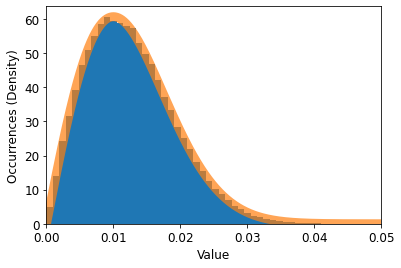

In [7]:
points = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(points, 50, density = True)
plt.xlim([0, .05])
x = np.linspace(0, .05, 1000)

plt.tick_params(labelsize = 12)
ax.set_ylabel("Occurrences (Density)", fontsize = 12)
ax.set_xlabel("Value", fontsize = 12)

ax.plot(x, stats.rayleigh.pdf(x, loc = 0, scale = .01), linewidth = 9, alpha = .7)
plt.show()

Statistical Question: What is the chance that the data at the value 
I am looking for a signal at (.028) is due to random variations 
as opposed to a real signal?

Method:<br>
Integrate Rayleigh pdf from hypothetical value to infinity- $ P(x) =  \int_{0.28}^{\infty} pdf(x)\,dx $. Alternatively, could do $ P(x) = 1 - \int_{-\infty}^{0.28} pdf(x)\,dx $ due to normalization.<br>
Then compare to Xσ from normal distribution.

In [8]:
hyp_val = .028

prob = 1 - stats.rayleigh.cdf(hyp_val, loc = 0, scale = 0.01)
prob

0.019841094744370347

To get the corresponding Xσ, we use the ppf function from earlier on the *normal* distribution function using the *rayleigh* probability found above.

In [9]:
sigma = stats.norm.ppf(prob, loc = 0, scale = 1)
print(sigma)

-2.057041963792887


In [10]:
hyp_val = .01

prob = 1 - stats.rayleigh.cdf(hyp_val, loc = 0, scale = 0.01)
print(prob)

sigma = stats.norm.ppf(prob, loc = 0, scale = 1)
print(sigma)

0.6065306597126334
0.27028802073873587


In [11]:
hyp_val = .005

prob = stats.rayleigh.cdf(hyp_val, loc = 0, scale = 0.01)
print(prob)

sigma = stats.norm.ppf(prob, loc = 0, scale = 1)
print(sigma)

0.1175030974154046
-1.1875615473802972


As measurements get farther from the locus of the distribution, they get less likely, although in decreasing magnitude.<br>
Negative signs come from the fact that opposite sides of the Gaussian are equally as likely but in opposite directions, i.e. above you can go 2σ above or below the mean, but the deviation from the mean on the below side is negative, whereas it is positive on the above side.

# Non-continuous distributions
### Binomial Distribution

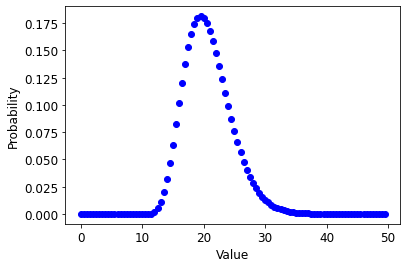

In [12]:
k = 2
p = .6

fig, ax = plt.subplots(1, 1)
x = np.arange(0,50, 0.5)
y = stats.binom.pmf(k, x, p, loc = -10)

plt.tick_params(labelsize = 12)
ax.set_ylabel('Probability', fontsize = 12)
ax.set_xlabel('Value', fontsize = 12)

ax.plot(x,y, 'bo')

# Peak near "center", leans towards the right side (faster fall off on left).

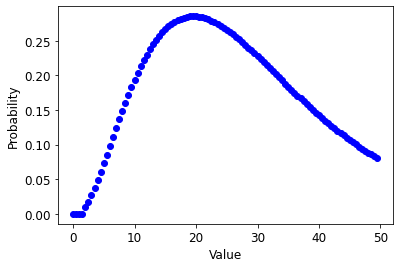

In [13]:
k = 2
p = .1

fig, ax = plt.subplots(1, 1)
x = np.arange(0, 50, 0.5)
y = stats.binom.pmf(k, x, p, loc = 0)

plt.tick_params(labelsize = 12)
ax.set_ylabel('Probability', fontsize = 12)
ax.set_xlabel('Value', fontsize = 12)

ax.plot(x,y, 'bo')

# Much more antisymmetric than the first one, this is due to being more "zoomed in" on the central area. If the domain was increased, then it would start to have more of a peak like the first one.
# Notice the p value is different (along with loc)- lower p means more spread.

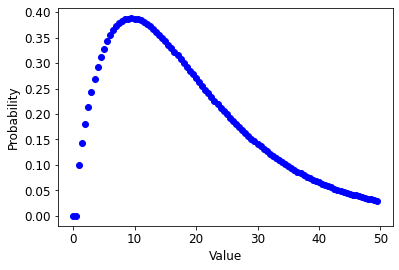

In [14]:
k = 1
p = .1

fig, ax = plt.subplots(1, 1)
x = np.arange(0, 50, 0.5)
y = stats.binom.pmf(k, x, p, loc = 0)

plt.tick_params(labelsize = 12)
ax.set_ylabel('Probability', fontsize = 12)
ax.set_xlabel('Value', fontsize = 12)

ax.plot(x,y, 'bo')

# Similar to last plot, but highest probable value shifted left- notice k value is lower here. 

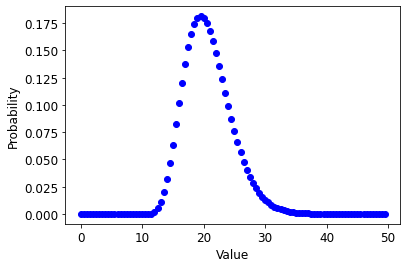

In [15]:
# Recreating first binomial plot

k = 2
p = .6

fig, ax = plt.subplots(1, 1)
x = np.arange(0,50, 0.5)
y = stats.binom.pmf(k, x, p, loc = -10)

plt.tick_params(labelsize = 12)
ax.set_ylabel('Probability', fontsize = 12)
ax.set_xlabel('Value', fontsize = 12)

ax.plot(x,y, 'bo')

Statistical Question: What is the chance that a value of 30 or higher is due to random chance as opposed to a signal?
Method: Sum probabilities of all values above the test value of 30.

In [16]:
prob = stats.binom.cdf(k, 30, p, loc = -10)
sigma = stats.norm.ppf(prob, loc = 0, scale = 1)
print(prob)
print(sigma)

0.021239876109960594
-2.028789333210327


Probabilities of all observed values of discrete, and the observed values themselves are discrete, so finding the probability above or below a certain point (where the integral from before has now become a sum of everything past the test point) will also be discrete. Hence the sigmas following from these values are discrete- they have to follow whatever probability is found. With continuous distributions you had a histogram which was matched with a continuous function that could have the same probability for a few observed values (because all of these observed values were fit in the same bin if they were close enough). With non-continuous distributions you should know exactly where the value belongs (because there is only certain allowed values), so you should be able to get a better idea of exactly where your value is in terms of its sigma.
<br>
The mean does not have to be one of the values observed because averaging gives the "in betweens" of observed values (e.g. the average of 1 and 2 is 1.5). Mean also does not change discretely in large data sets, because changing the number of occurrences of a single value will shift the mean based on that change, but as you increase the total number of occurrences, this shift becomes very small compared to the total, and so the mean moves nearly continuously between different values. This also means the standard deviation will be continuous because it is based off of the mean.